## <span style='color:red '>4.0 Importing required libraries</span>

In [38]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

## <span style='color:red '>5.0 Importing dataset</span>

In [39]:
dataset=pd.read_csv('household_power_consumption_cleaned.csv')
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
0,0.312,0.062,242.60,1.2,0,0,1,2,11,1
1,0.870,0.186,243.51,3.6,0,0,13,5,9,13
2,1.546,0.278,239.99,6.4,0,1,18,19,4,19
3,0.614,0.000,236.88,2.6,1,0,0,14,10,1
4,1.328,0.146,243.24,5.4,0,0,1,13,5,1


### <span style='color:red '>5.1 Handeling Missing Values</span>

In [40]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [41]:
### getting numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_features)

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'day', 'month', 'Total_power_use']


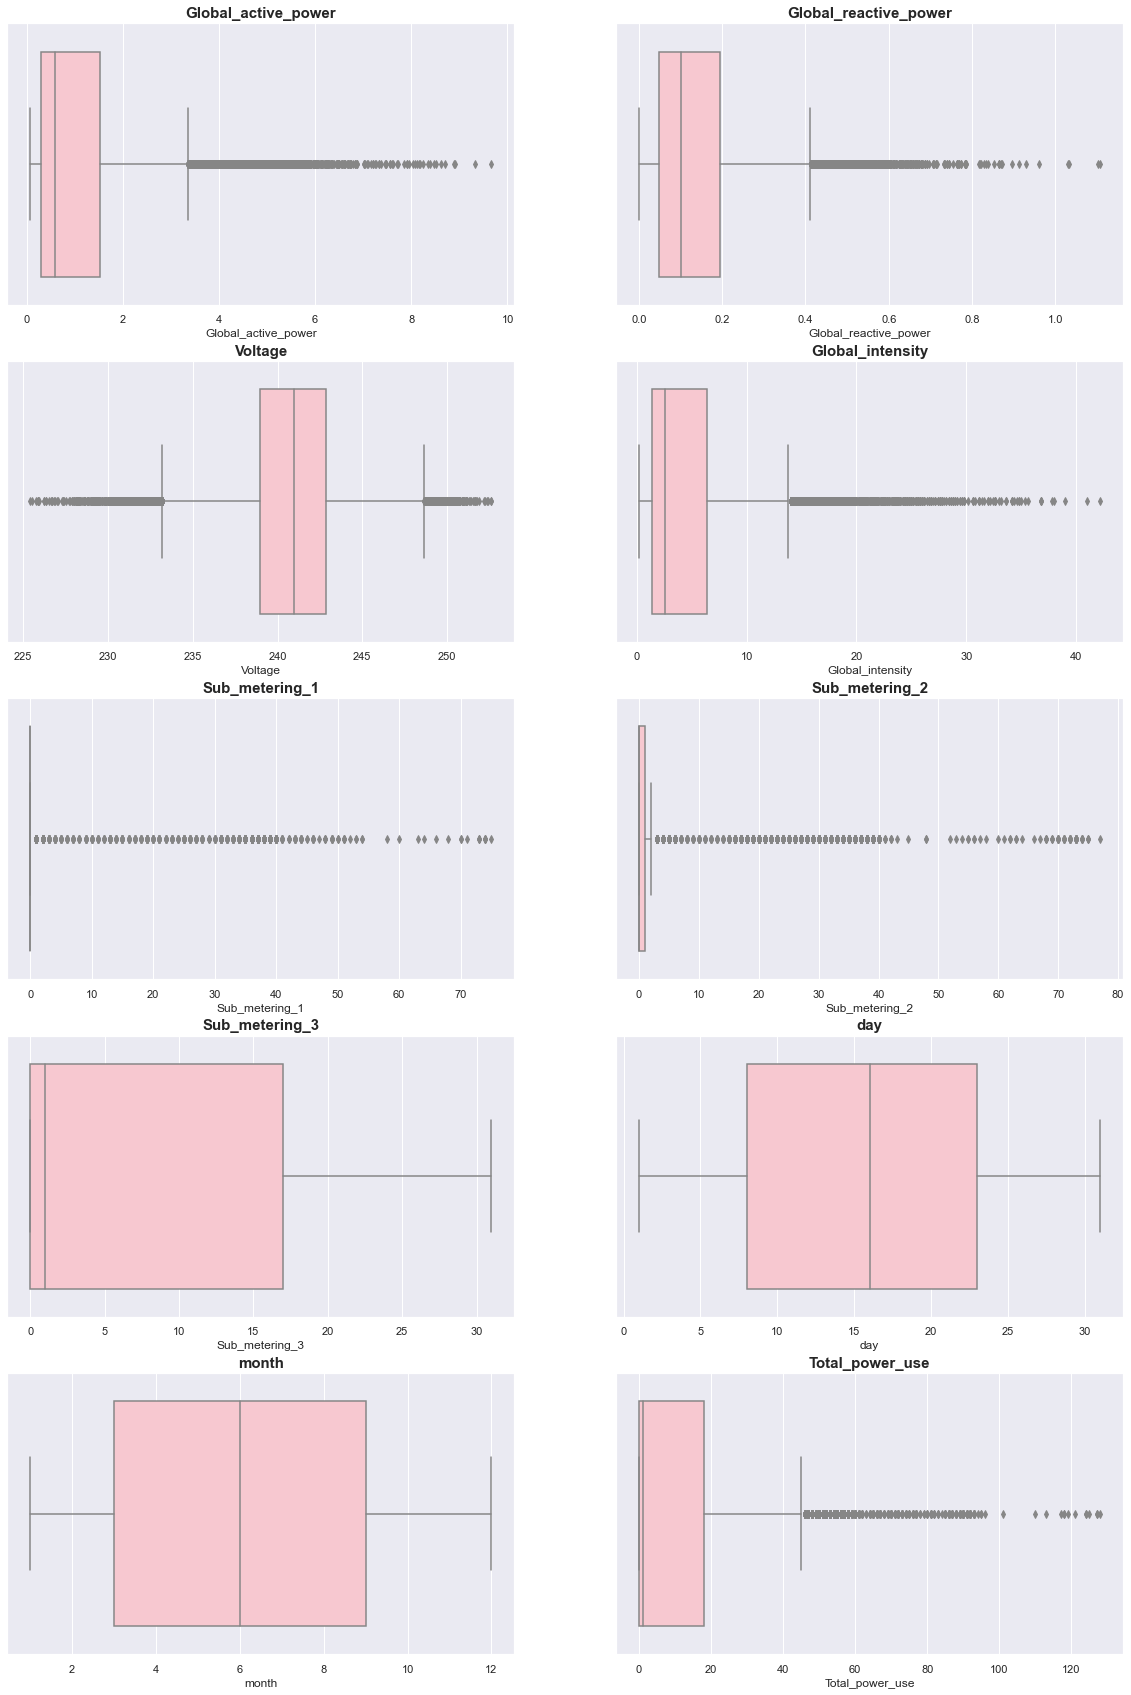

In [42]:
### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [43]:
### Capping outliers from numerical features
for feature in numerical_features:
    
    dataset=remove_outliers(dataset, feature)

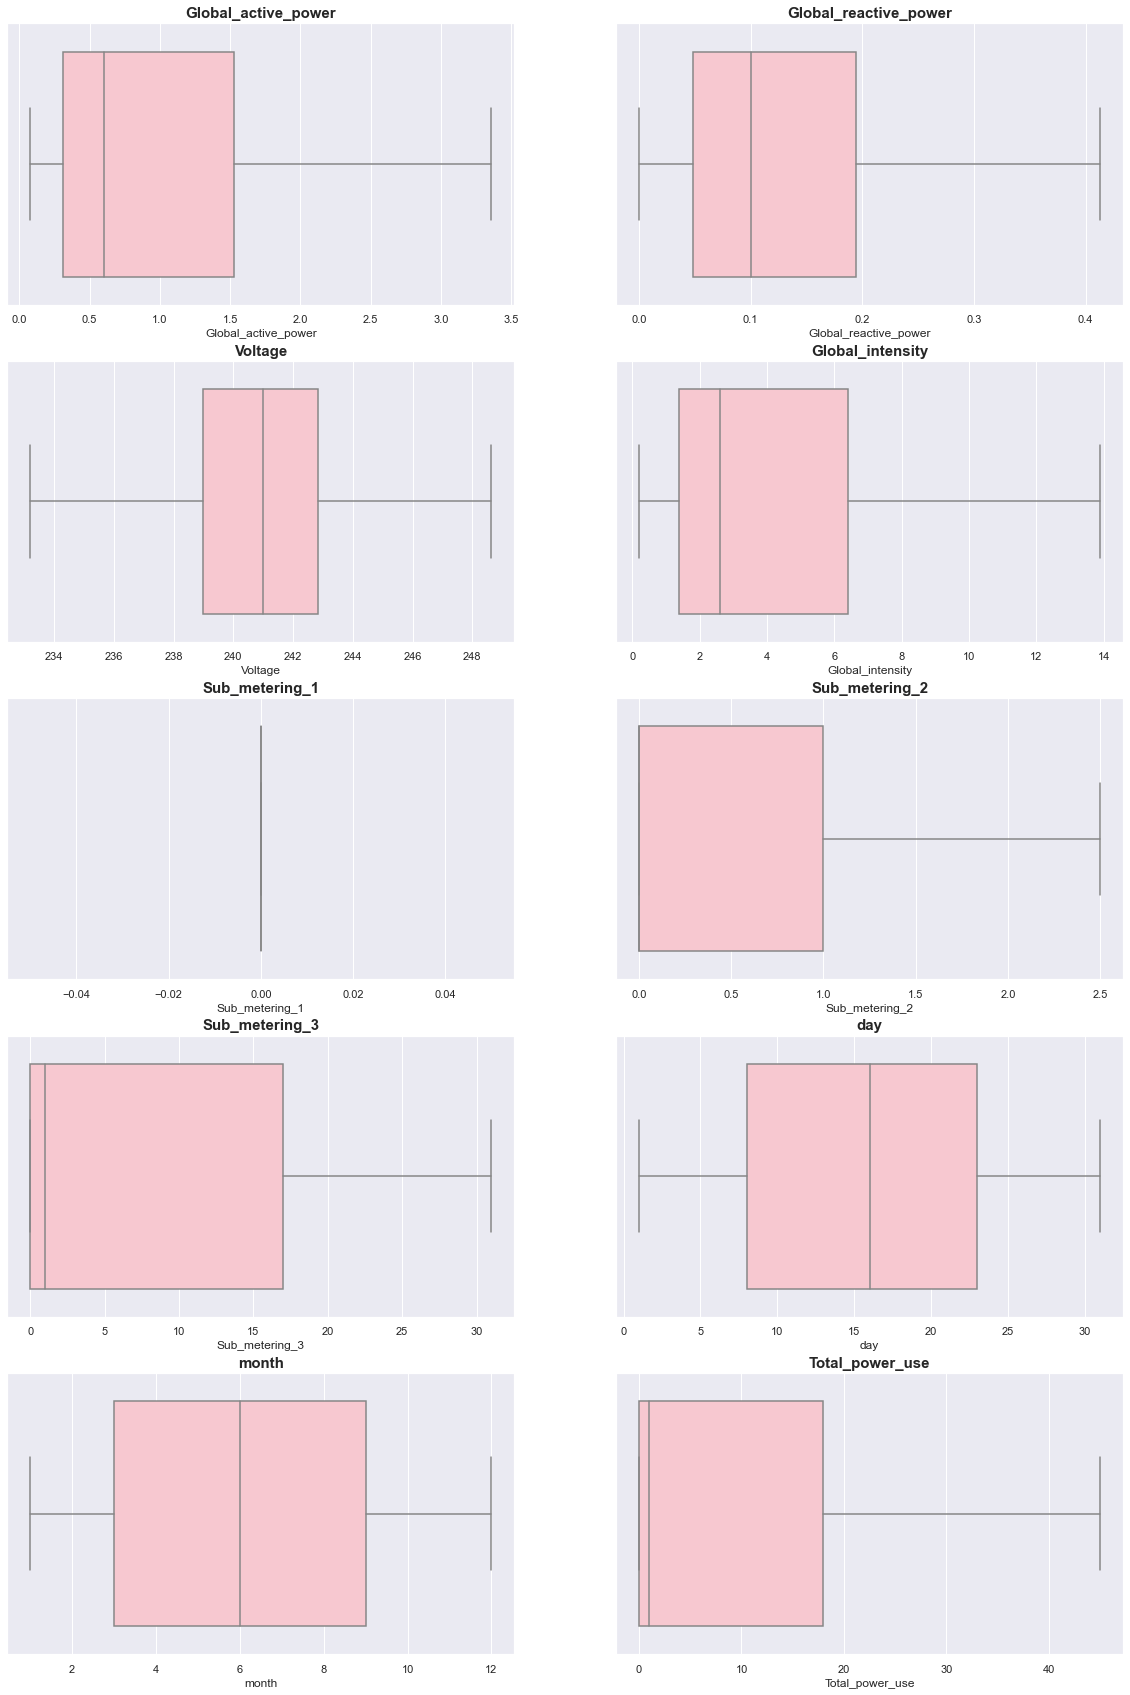

In [44]:
### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

## <span style='color:red '>6.0 Model and Evaluation</span>

### <span style='color:red '>6.1 Seperating Independent and Dependent features</span>

In [45]:
### Splitting data into independent feature dataframe and dependent feature series
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,0.312,0.062,242.60,1.2,0,0.0,1.0,2.0,11
1,0.870,0.186,243.51,3.6,0,0.0,13.0,5.0,9
2,1.546,0.278,239.99,6.4,0,1.0,18.0,19.0,4
3,0.614,0.000,236.88,2.6,0,0.0,0.0,14.0,10
4,1.328,0.146,243.24,5.4,0,0.0,1.0,13.0,5


In [46]:
y.head()

0     1
1    13
2    19
3     1
4     1
Name: Total_power_use, dtype: int64

### <span style='color:red '>6.2 Train Test Split</span>

In [47]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
26272,2.662,0.186,235.27,11.2,0,0.0,17.0,1.0,2
20487,1.450,0.000,238.70,6.0,0,0.0,17.0,5.0,1
10372,1.306,0.122,238.89,5.4,0,0.0,18.0,22.0,9
38673,0.260,0.090,239.72,1.2,0,0.0,1.0,7.0,7
435,0.104,0.000,241.22,0.4,0,0.0,0.0,17.0,8


In [48]:
y_train.head()

26272    17
20487    17
10372    18
38673     1
435       0
Name: Total_power_use, dtype: int64

In [49]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
43860,0.360,0.124,242.87,1.6,0,0.0,1.0,3.0,8
4022,1.538,0.413,239.57,6.8,0,2.0,3.0,17.0,7
37835,2.330,0.000,242.30,9.6,0,0.0,0.0,5.0,1
13509,3.266,0.190,236.90,13.8,0,0.0,17.0,9.0,12
12499,0.474,0.082,243.02,2.0,0,0.0,0.0,24.0,12


In [50]:
y_test.head()

43860     1
4022      5
37835     0
13509    17
12499     0
Name: Total_power_use, dtype: int64

In [51]:
### both will have same shape
X_train.shape, y_train.shape

((36300, 9), (36300,))

In [52]:
### both will have same shape
X_test.shape, y_test.shape

((12100, 9), (12100,))

### <span style='color:red '>6.3 Feature Scaling</span>

In [53]:
scaler=StandardScaler()
scaler

StandardScaler()

In [54]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.75728429,  0.60844451, -1.79390239, ...,  1.23556367,
        -1.66406023, -1.27481339],
       [ 0.43549433, -1.14666889, -0.69023577, ...,  1.23556367,
        -1.21044203, -1.56879178],
       [ 0.27844998,  0.00453452, -0.62909972, ...,  1.35360246,
         0.71743529,  0.78303533],
       ...,
       [-0.78159939, -0.16531516,  0.28794105, ..., -0.6530569 ,
         1.73807622,  1.07701371],
       [-0.59619981, -0.05208204,  0.38447166, ..., -0.77109568,
        -0.30320565,  1.66497049],
       [ 0.50529182, -0.5427589 ,  0.28472337, ...,  1.35360246,
        -1.43725113, -1.27481339]])

In [55]:
X_test=scaler.transform(X_test)
X_test

array([[-0.75324416,  0.02340671,  0.65153968, ..., -0.6530569 ,
        -1.43725113,  0.48905694],
       [ 0.53146588,  2.75043774, -0.41029701, ..., -0.41697933,
         0.15041254,  0.19507855],
       [ 1.39520981, -1.14666889,  0.46813152, ..., -0.77109568,
        -1.21044203, -1.56879178],
       ...,
       [ 0.3918709 , -0.25967609,  0.06913834, ...,  1.47164125,
         0.60403074, -0.39287822],
       [-0.70962073, -1.14666889, -0.71275958, ..., -0.6530569 ,
         1.05764893, -0.09889984],
       [-0.89720148, -1.14666889,  0.25898187, ..., -0.77109568,
        -0.98363294,  1.3709921 ]])

### <span style='color:red '>6.4 Model training and performance</span>

In [56]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse=round(mean_squared_error(actual_val, pred_val),3)
    mae=round(mean_absolute_error(actual_val, pred_val),3)
    rmse=round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco=round(r2_score(actual_val, pred_val),4)
    adj_r2_sco=round(1-(1-r2_sco)*(len(actual_val)-1)/(len(actual_val)-X_test.shape[1]-1),4)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [57]:
### creating dictionary containing model objects for different algorithmn
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regresion":Lasso(),
    "Elastic-Net Regression":ElasticNet(),
    "Support Vector Regressor":SVR(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Bagging Regressor": BaggingRegressor(base_estimator=LinearRegression()),
    "Extra Tree Regressor": ExtraTreesRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
    
}

In [58]:
### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [59]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [60]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Linear Regression Model

Model Performance for training dataset
Mean Square Error: 22.94
Mean Absolute Error: 2.784
Root Mean Square Error: 4.79
R2 Score: 0.8212
Adjusted R2 Score: 0.8212
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 23.16
Mean Absolute Error: 2.782
Root Mean Square Error: 4.812
R2 Score: 0.8155
Adjusted R2 Score: 0.8154
**************************************************


Ridge Regression Model

Model Performance for training dataset
Mean Square Error: 22.941
Mean Absolute Error: 2.783
Root Mean Square Error: 4.79
R2 Score: 0.8212
Adjusted R2 Score: 0.8212
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 23.16
Mean Absolute Error: 2.782
Root Mean Square Error: 4.812
R2 Score: 0.8155
Adjusted R2 Score: 0.8154
**************************************************


Lasso Regresion Model

Model Performance for training dataset
Mean Square Error: 25.183
Mean Abs

In [61]:
### for voting Regressor
r1= LinearRegression()
r2= Ridge()
r3= RandomForestRegressor() 
vr=VotingRegressor([('Linear_Regression', r1), ('Ridge', r2), ('Random_Forest_Regressor', r3)])

### Model prediction 
y_pred, pred_val=model_trainer(vr, X_train, y_train, X_test)

### Model evaluation for training data
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
print("Voting Regressor Model\n")
print("Model Performance for training dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
print("-"*50)

### Model evaluation for test data      
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
print("Model Performance for Test dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
model_list.append('Voting Regressor')
r2_score_list.append(r2_sco)
adj_r2_score.append(adj_r2_sco)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)
print("*"*50)
print("\n")

Voting Regressor Model

Model Performance for training dataset
Mean Square Error: 11.945
Mean Absolute Error: 1.941
Root Mean Square Error: 3.456
R2 Score: 0.9069
Adjusted R2 Score: 0.9069
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 16.058
Mean Absolute Error: 2.094
Root Mean Square Error: 4.007
R2 Score: 0.8721
Adjusted R2 Score: 0.872
**************************************************




### <span style='color:red '>6.5 Model Performance and Visualization</span>

In [62]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,R2_score,Adjusted R2_score,MSE,MAE,RMSE
0,Random Forest Regressor,0.9130,0.9129,10.921,0.823,3.305
1,Extra Tree Regressor,0.9119,0.9118,11.053,0.819,3.325
2,XGBoost Regressor,0.9082,0.9081,11.525,0.909,3.395
3,GradientBoost Regressor,0.9050,0.9049,11.930,1.043,3.454
4,Voting Regressor,0.8721,0.8720,16.058,2.094,4.007
5,AdaBoost Regressor,0.8629,0.8628,17.210,1.909,4.148
6,Support Vector Regressor,0.8546,0.8545,18.246,1.075,4.272
7,Decision Tree Regressor,0.8477,0.8476,19.117,0.860,4.372
8,Linear Regression,0.8155,0.8154,23.160,2.782,4.812
9,Ridge Regression,0.8155,0.8154,23.160,2.782,4.812


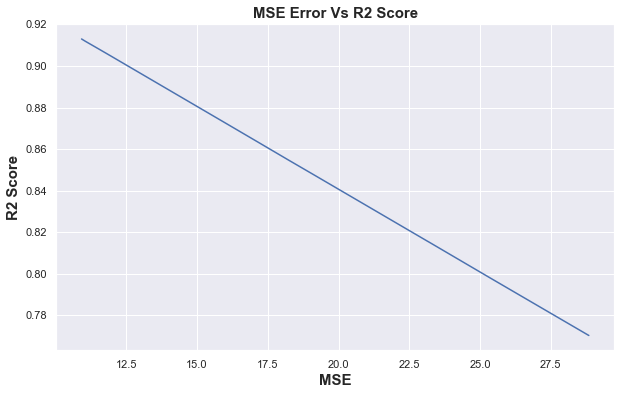

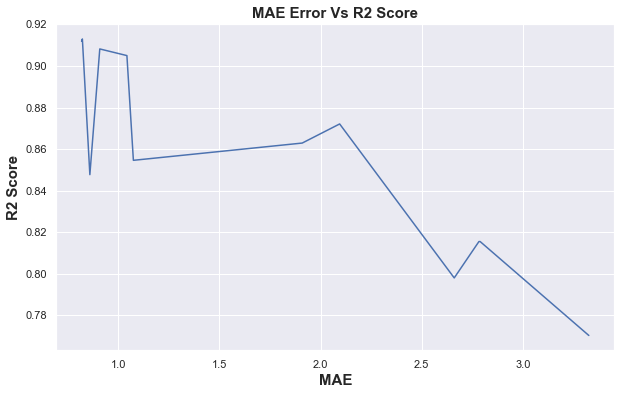

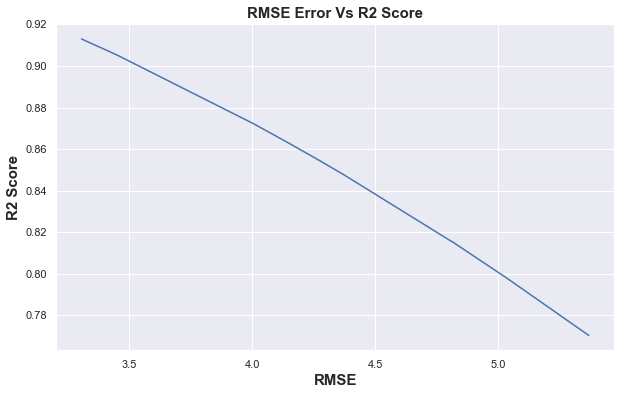

In [63]:
for feature in ['MSE', 'MAE', 'RMSE']:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=feature, y='R2_score', data=model_perf)
    plt.xlabel("{}".format(feature), fontweight='bold', fontsize=15)
    plt.ylabel("R2 Score", fontweight='bold', fontsize=15)
    plt.title("{} Error Vs R2 Score".format(feature), fontweight='bold', fontsize=15)

### <span style='color:blue'>Observation</span>
1. As error(MSE, MAE and RMSE) increases the accuracy of the model decreases.
